# Define spaces

In [1]:
import torch
from latentis.space import LatentSpace
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

N_SAMPLES = 100
SPACE1_DIM = 50
SPACE2_DIM = 50

space1 = LatentSpace(vector_source=torch.randn(N_SAMPLES, SPACE1_DIM))
space2 = LatentSpace(vector_source=torch.randn(N_SAMPLES, SPACE2_DIM))

/home/kinwai/miniforge3/envs/anchor/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


# Define Translator

In [2]:
from latentis import transform
from latentis.transform.dim_matcher import ZeroPadding
from latentis.transform._abstract import Estimator
from latentis.transform.translate import Translator, MatrixAligner
from latentis.transform.translate.functional import sgd_affine_align_state, svd_align_state
from latentis.transform.base import StandardScaling

translator = Translator(
    aligner=MatrixAligner(name="svd_aligner", align_fn_state=svd_align_state),
    x_transform=transform.StandardScaling(),
    y_transform=transform.StandardScaling(),
    dim_matcher=ZeroPadding()
)

# Fit Translator

In [3]:
translator.fit(x=space1.vectors, y=space2.vectors)

Translator(
  (x_transform): name=centering, reverse_fn=standard_scaling_inverse)
  (y_transform): name=centering, reverse_fn=standard_scaling_inverse)
  (aligner): MatrixAligner()
  (dim_matcher): ZeroPadding()
)

# Latent Translation

In [4]:
x_transformed, y_transformed = translator.transform(x=space1.vectors, y=space2.vectors) 

In [5]:
x_transformed.shape, y_transformed.shape

(torch.Size([100, 50]), torch.Size([100, 50]))

# Visualization

In [12]:
pca = PCA(n_components=2)
# create the same PCA model for both spaces
pca.fit(torch.cat((space1.vectors, space2.vectors), dim=0).numpy())

PCA(n_components=2)

In [13]:
space1_pca = pca.transform(space1.vectors.numpy())
space2_pca = pca.transform(space2.vectors.numpy())

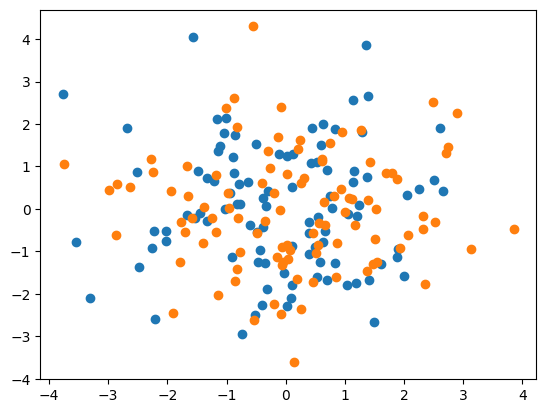

In [15]:
# plot space1_pca and space2_pca in a 2D plot
plt.scatter(space1_pca[:, 0], space1_pca[:, 1], label="space1")
plt.scatter(space2_pca[:, 0], space2_pca[:, 1], label="space2")

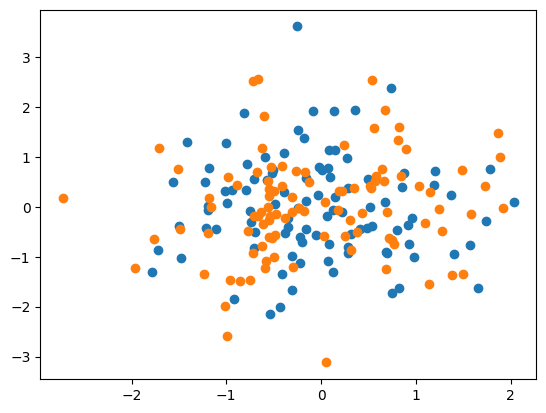

In [17]:
# plot x_transformed and y_transformed in a 2D plot
plt.scatter(x_transformed[:, 0], x_transformed[:, 1], label="x_transformed")
plt.scatter(y_transformed[:, 0], y_transformed[:, 1], label="y_transformed")